<a href="https://colab.research.google.com/github/sneha5678-cmyk/CLASS-WORK/blob/main/ORDER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-3-c1ad9398f65d>:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_profit = df.groupby('DISCOUNT_RANGE')['PROFIT'].mean().reset_index()


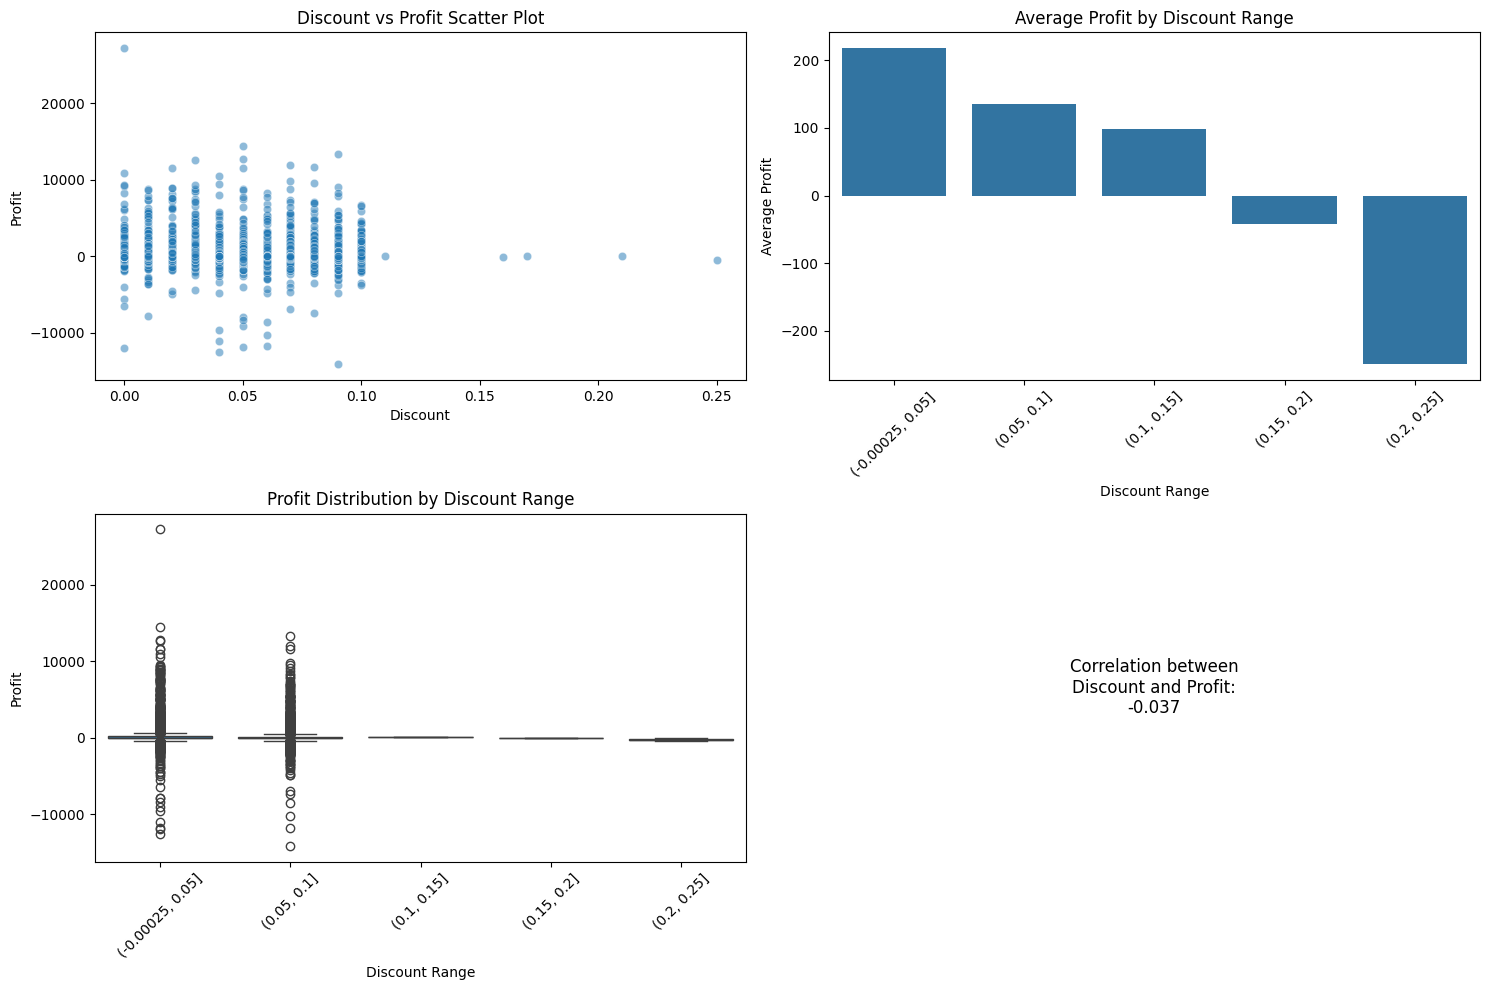


Summary Statistics:

1. Average Profit by Discount Range:
     DISCOUNT_RANGE      PROFIT
0  (-0.00025, 0.05]  218.012061
1       (0.05, 0.1]  135.551913
2       (0.1, 0.15]   98.440000
3       (0.15, 0.2]  -41.820000
4       (0.2, 0.25] -249.395000

2. Profitability Analysis:
Profitable Orders: 4135 (49.23%)
Average Profit: $181.18
Maximum Profit: $27220.69
Minimum Profit: $-14140.70

3. Discount Analysis:
Average Discount: 0.050
Maximum Discount: 0.250
Minimum Discount: 0.000


In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset with specified encoding
df = pd.read_csv('/content/ORDERS.csv', encoding='latin-1')  # Changed this line

# Create a figure with multiple subplots
plt.figure(figsize=(15, 10))

# 1. Scatter plot of Discount vs Profit
plt.subplot(2, 2, 1)
sns.scatterplot(data=df, x='DISCOUNT', y='PROFIT', alpha=0.5)
plt.title('Discount vs Profit Scatter Plot')
plt.xlabel('Discount')
plt.ylabel('Profit')

# 2. Average profit for different discount ranges
df['DISCOUNT_RANGE'] = pd.cut(df['DISCOUNT'], bins=5)
avg_profit = df.groupby('DISCOUNT_RANGE')['PROFIT'].mean().reset_index()

plt.subplot(2, 2, 2)
sns.barplot(data=avg_profit, x='DISCOUNT_RANGE', y='PROFIT')
plt.title('Average Profit by Discount Range')
plt.xticks(rotation=45)
plt.xlabel('Discount Range')
plt.ylabel('Average Profit')

# 3. Box plot to show profit distribution across discount ranges
plt.subplot(2, 2, 3)
sns.boxplot(data=df, x='DISCOUNT_RANGE', y='PROFIT')
plt.title('Profit Distribution by Discount Range')
plt.xticks(rotation=45)
plt.xlabel('Discount Range')
plt.ylabel('Profit')

# 4. Calculate and display correlation
correlation = df['DISCOUNT'].corr(df['PROFIT'])
plt.subplot(2, 2, 4)
plt.text(0.5, 0.5, f'Correlation between\nDiscount and Profit:\n{correlation:.3f}',
         horizontalalignment='center', verticalalignment='center', fontsize=12)
plt.axis('off')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Additional analysis: Summary statistics
print("\nSummary Statistics:")
print("\n1. Average Profit by Discount Range:")
print(avg_profit)

print("\n2. Profitability Analysis:")
profitable_orders = len(df[df['PROFIT'] > 0])
total_orders = len(df)
print(f"Profitable Orders: {profitable_orders} ({profitable_orders/total_orders*100:.2f}%)")
print(f"Average Profit: ${df['PROFIT'].mean():.2f}")
print(f"Maximum Profit: ${df['PROFIT'].max():.2f}")
print(f"Minimum Profit: ${df['PROFIT'].min():.2f}")

print("\n3. Discount Analysis:")
print(f"Average Discount: {df['DISCOUNT'].mean():.3f}")
print(f"Maximum Discount: {df['DISCOUNT'].max():.3f}")
print(f"Minimum Discount: {df['DISCOUNT'].min():.3f}")

<ipython-input-5-b2e91f518175>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=segment_profit, x='CUSTOMERSEGMENT', y='sum', palette='viridis')
<ipython-input-5-b2e91f518175>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_metrics, x='REGION', y='PROFIT_MARGIN', palette='coolwarm')
<ipython-input-5-b2e91f518175>:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=priority_profit, x='ORDERPRIOTORITY', y='PROFIT', palette='RdYlGn')


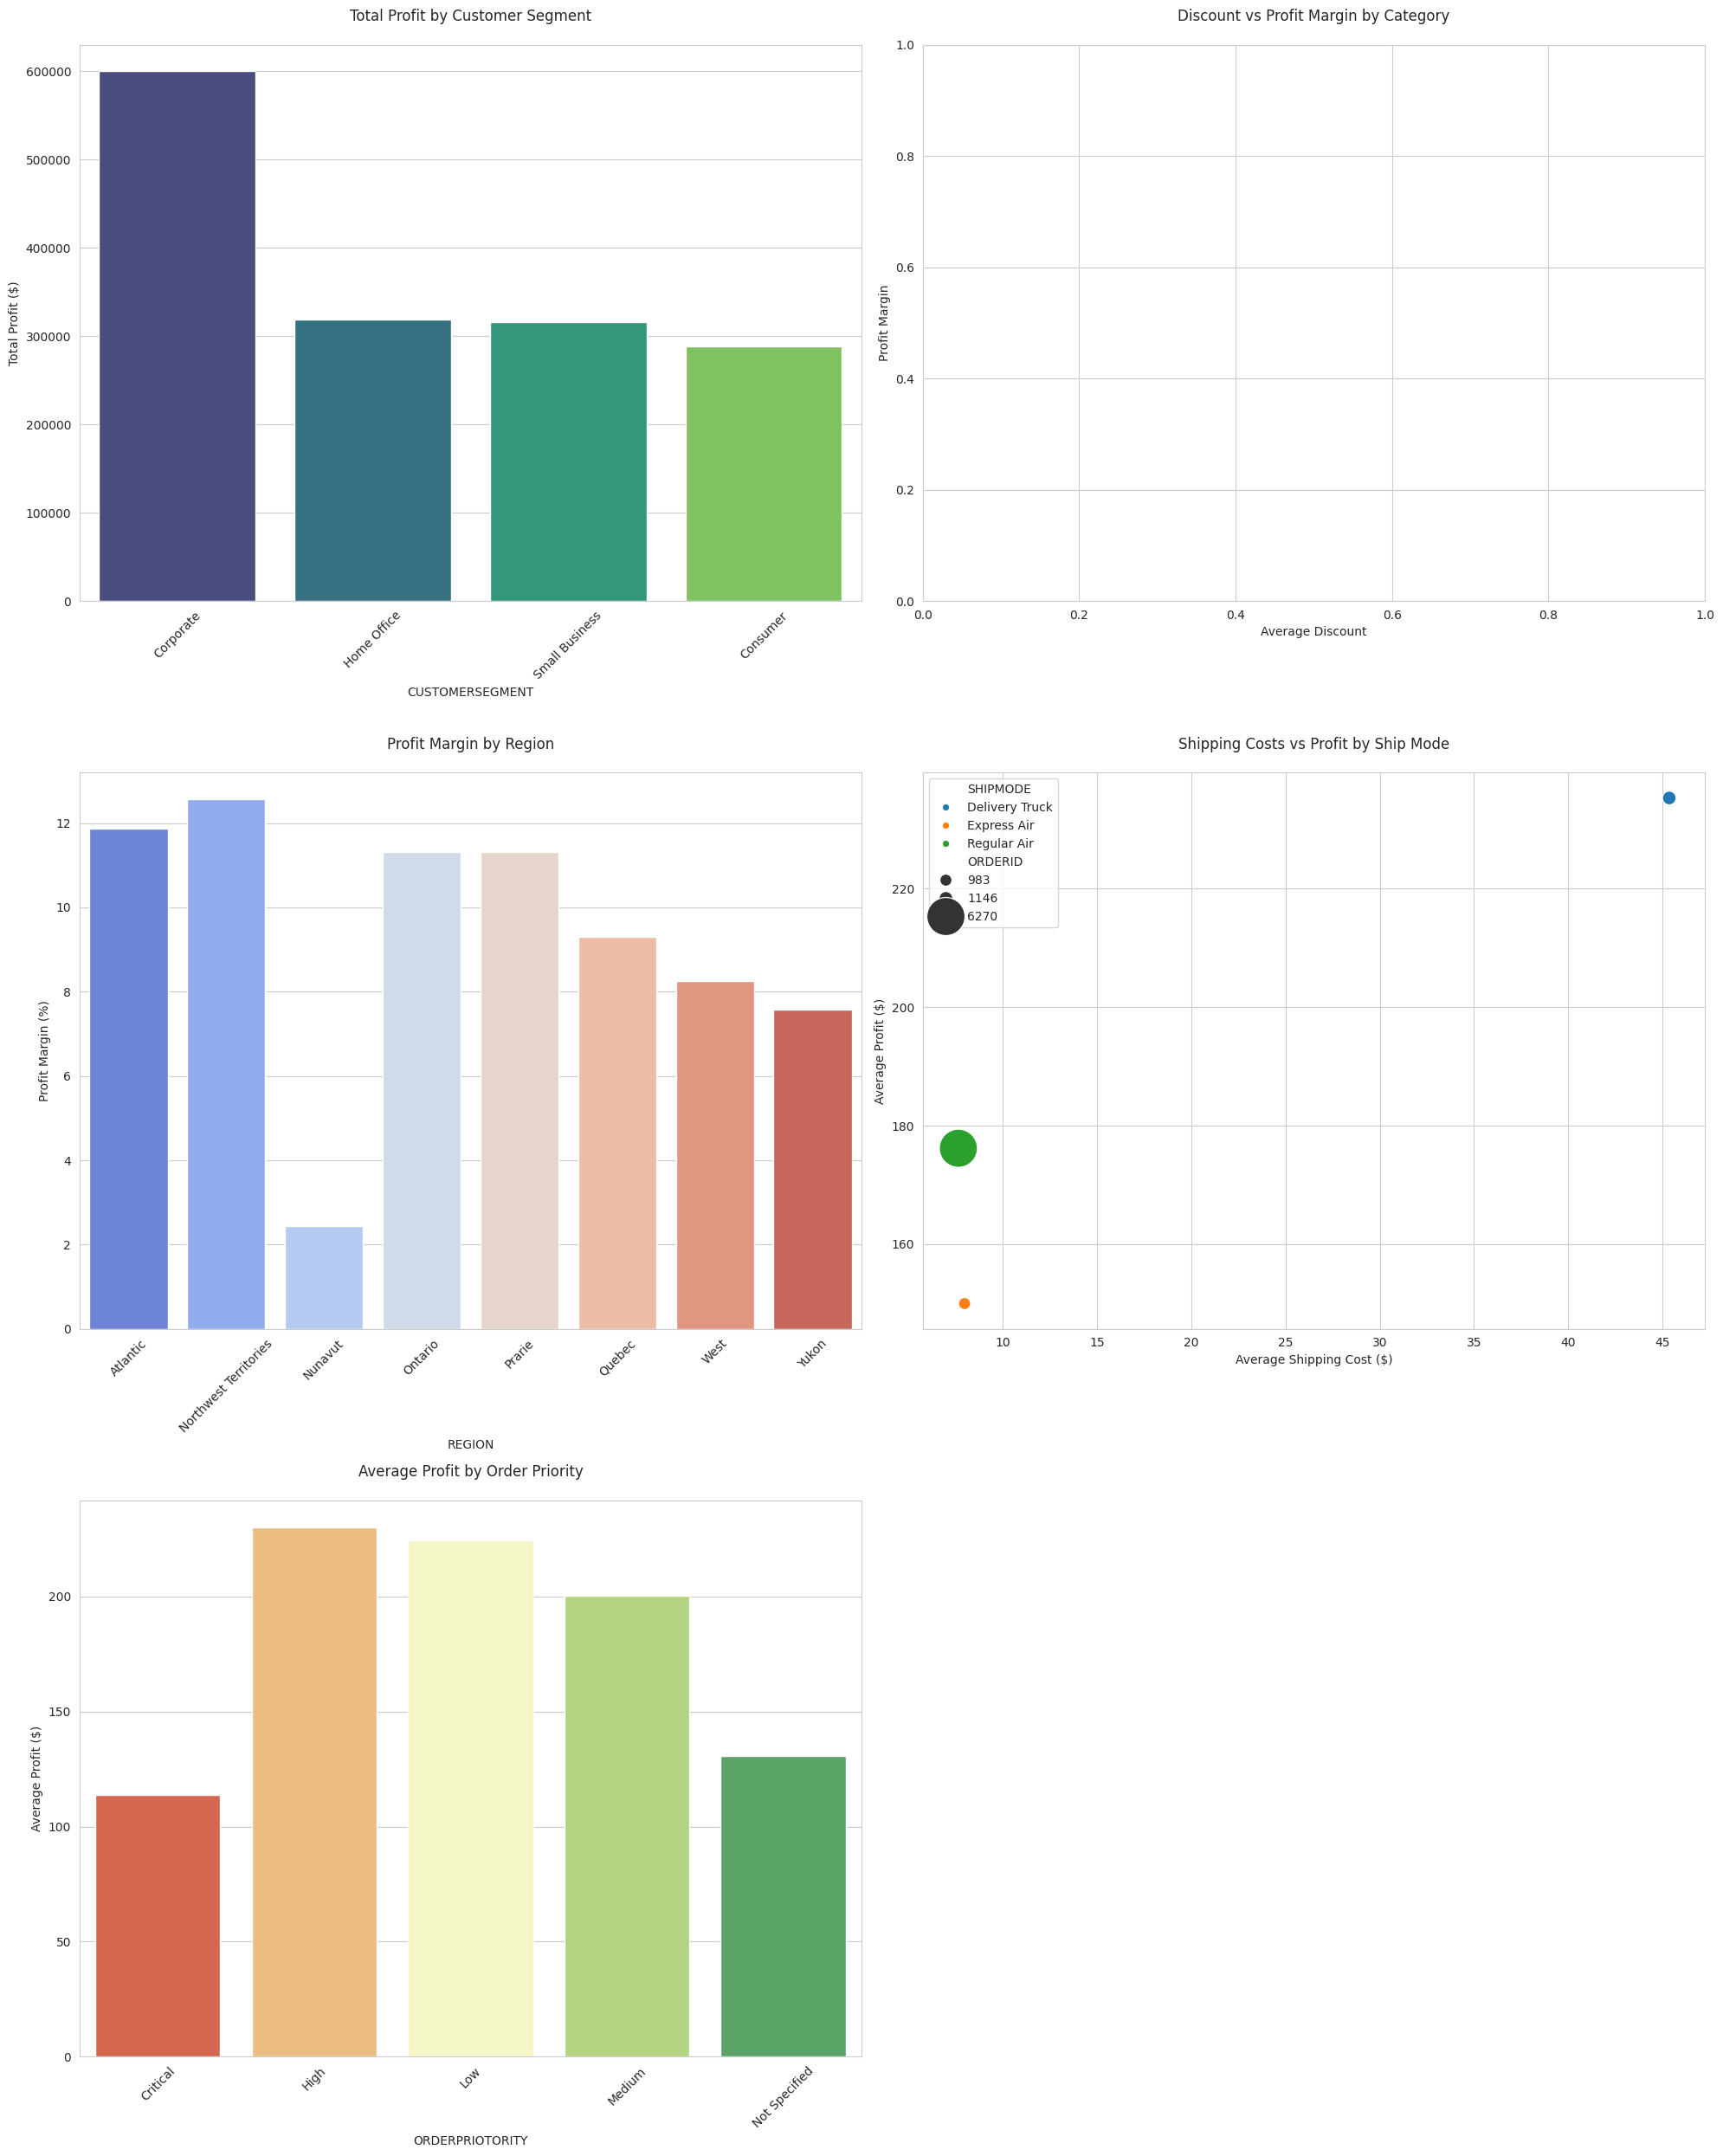


=== DETAILED INSIGHTS AND MARKETING STRATEGIES ===

1. CUSTOMER SEGMENT ANALYSIS:
  CUSTOMERSEGMENT        mean        sum
1       Corporate  194.975943  599746.00
2     Home Office  156.670290  318354.03
3  Small Business  192.270408  315708.01
0        Consumer  174.627010  287959.94

Marketing Strategy:
- Focus premium campaigns on most profitable segments
- Develop segment-specific retention programs
- Create targeted value propositions for each segment

2. PRODUCT CATEGORY DISCOUNT IMPACT:
   PRODUCTCATEGORY  DISCOUNT      PROFIT  PROFIT_MARGIN
0        Furniture  0.049287   68.116607            NaN
1  Office Supplies  0.050230  112.369074            NaN
2       Technology  0.048746  429.207516            NaN

Marketing Strategy:
- Optimize discount structures by category
- Create bundle deals for high-margin products
- Implement category-specific promotional calendars

3. REGIONAL PERFORMANCE:
                  REGION         SALES     PROFIT  ORDERID  PROFIT_MARGIN
0           

In [5]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set figure style using seaborn
sns.set_style("whitegrid")

# Read the dataset with specified encoding
df = pd.read_csv('/content/ORDERS.csv', encoding='latin-1')

# Create the figure
fig = plt.figure(figsize=(20, 25))

# 1. INSIGHT 1: Segment Profitability Analysis
plt.subplot(3, 2, 1)
segment_profit = df.groupby('CUSTOMERSEGMENT')['PROFIT'].agg(['mean', 'sum']).reset_index()
segment_profit = segment_profit.sort_values('sum', ascending=False)

sns.barplot(data=segment_profit, x='CUSTOMERSEGMENT', y='sum', palette='viridis')
plt.title('Total Profit by Customer Segment', fontsize=12, pad=20)
plt.xticks(rotation=45)
plt.ylabel('Total Profit ($)')

# 2. INSIGHT 2: Discount Impact by Product Category
plt.subplot(3, 2, 2)
category_discount = df.groupby('PRODUCTCATEGORY')[['DISCOUNT', 'PROFIT']].mean().reset_index()
category_discount['PROFIT_MARGIN'] = category_discount['PROFIT'] / df.groupby('PRODUCTCATEGORY')['SALES'].mean()

sns.scatterplot(data=category_discount, x='DISCOUNT', y='PROFIT_MARGIN',
                size='PROFIT', sizes=(100, 1000), hue='PRODUCTCATEGORY')
plt.title('Discount vs Profit Margin by Category', fontsize=12, pad=20)
plt.xlabel('Average Discount')
plt.ylabel('Profit Margin')

# 3. INSIGHT 3: Regional Performance Analysis
plt.subplot(3, 2, 3)
region_metrics = df.groupby('REGION').agg({
    'SALES': 'sum',
    'PROFIT': 'sum',
    'ORDERID': 'count'
}).reset_index()
region_metrics['PROFIT_MARGIN'] = (region_metrics['PROFIT'] / region_metrics['SALES']) * 100

sns.barplot(data=region_metrics, x='REGION', y='PROFIT_MARGIN', palette='coolwarm')
plt.title('Profit Margin by Region', fontsize=12, pad=20)
plt.xticks(rotation=45)
plt.ylabel('Profit Margin (%)')

# 4. INSIGHT 4: Shipping Mode Efficiency
plt.subplot(3, 2, 4)
shipping_analysis = df.groupby('SHIPMODE').agg({
    'SHIPPINGCOSTS': 'mean',
    'PROFIT': 'mean',
    'ORDERID': 'count'
}).reset_index()

sns.scatterplot(data=shipping_analysis, x='SHIPPINGCOSTS', y='PROFIT',
                size='ORDERID', sizes=(100, 1000), hue='SHIPMODE')
plt.title('Shipping Costs vs Profit by Ship Mode', fontsize=12, pad=20)
plt.xlabel('Average Shipping Cost ($)')
plt.ylabel('Average Profit ($)')

# 5. INSIGHT 5: Order Priority vs Profitability
plt.subplot(3, 2, 5)
priority_profit = df.groupby('ORDERPRIOTORITY')['PROFIT'].mean().reset_index()
sns.barplot(data=priority_profit, x='ORDERPRIOTORITY', y='PROFIT', palette='RdYlGn')
plt.title('Average Profit by Order Priority', fontsize=12, pad=20)
plt.xticks(rotation=45)
plt.ylabel('Average Profit ($)')

plt.tight_layout()
plt.show()

# Print detailed insights and marketing strategies
print("\n=== DETAILED INSIGHTS AND MARKETING STRATEGIES ===\n")

# Insight 1: Customer Segment Analysis
print("1. CUSTOMER SEGMENT ANALYSIS:")
print(segment_profit)
print("\nMarketing Strategy:")
print("- Focus premium campaigns on most profitable segments")
print("- Develop segment-specific retention programs")
print("- Create targeted value propositions for each segment")

# Insight 2: Product Category Performance
print("\n2. PRODUCT CATEGORY DISCOUNT IMPACT:")
print(category_discount)
print("\nMarketing Strategy:")
print("- Optimize discount structures by category")
print("- Create bundle deals for high-margin products")
print("- Implement category-specific promotional calendars")

# Insight 3: Regional Performance
print("\n3. REGIONAL PERFORMANCE:")
print(region_metrics)
print("\nMarketing Strategy:")
print("- Develop region-specific marketing campaigns")
print("- Address underperforming regions with targeted promotions")
print("- Leverage successful regional strategies in similar markets")

# Insight 4: Shipping Efficiency
print("\n4. SHIPPING MODE ANALYSIS:")
print(shipping_analysis)
print("\nMarketing Strategy:")
print("- Promote cost-effective shipping options")
print("- Offer free shipping thresholds based on profitability")
print("- Create shipping-based promotional campaigns")

# Insight 5: Order Priority Impact
print("\n5. ORDER PRIORITY ANALYSIS:")
print(priority_profit)
print("\nMarketing Strategy:")
print("- Align pricing strategy with order priority")
print("- Create incentives for optimal priority selection")
print("- Develop priority-based promotional offers")

# Calculate overall performance metrics
print("\n=== OVERALL PERFORMANCE METRICS ===")
print(f"Total Revenue: ${df['SALES'].sum():,.2f}")
print(f"Total Profit: ${df['PROFIT'].sum():,.2f}")
print(f"Average Profit Margin: {(df['PROFIT'].sum() / df['SALES'].sum() * 100):.2f}%")
print(f"Average Discount: {df['DISCOUNT'].mean():.2f}")